In [1]:
import calc_rng_dmg # need to restart kernal if you change amt of resil
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

df_input = []
df_input2 = []
for amt_resil in range(6):
    for amt_shirking_fort in range(6):
        for amt_aversion in range(6):
            if amt_shirking_fort + amt_aversion == 0 or (amt_shirking_fort + amt_resil >= 5 and amt_shirking_fort + amt_aversion <= 6): # want combined 5-6 EA/SF or non sf/ea for resil data
                for i in range(100000):
                    temp_list = calc_rng_dmg.calc_dmg("light_fs_vicious_fire_damage",amt_resil_ui=amt_resil,amt_shirking_ui=amt_shirking_fort,amt_aversion_ui=amt_aversion)
                    temp_list.append(amt_resil)
                    temp_list.append(amt_shirking_fort)
                    temp_list.append(amt_aversion)
                    df_input.append(temp_list)

df = pd.DataFrame(df_input,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage","amt resil","amt shirking fort", "amt aversion"])

### Meta Gear Analysis

In [2]:
sf_df = df[(df['amt resil'] == 5) & (df['amt shirking fort'] == 5)]
ea_df = df[(df['amt resil'] == 5) & (df['amt aversion'] == 5)]
illegal_sf_df = df[(df['amt resil'] == 4) & (df['amt shirking fort'] == 5) & (df['amt aversion'] == 1)]
illegal_ea_df = df[(df['amt resil'] == 4) & (df['amt shirking fort'] == 1) & (df['amt aversion'] == 5)]

sf_df.sort_values(by='damage')

,damage,base damage,crit,crit damage modifier,empower %,dmg absorbed,rend percentage,amt resil,amt shirking fort,amt aversion
8092401,1035,1738,False,1.38,0.91,0.85,0.77,5,5,1
8091758,1056,1726,False,1.38,0.90,0.85,0.80,5,5,1
7955734,1057,1775,False,1.38,0.91,0.85,0.77,5,5,0
8031488,1060,1738,False,1.38,0.92,0.85,0.78,5,5,1
8041052,1070,1751,False,1.38,0.91,0.85,0.79,5,5,1
...,...,...,...,...,...,...,...,...,...,...
7971370,3550,2612,True,1.38,1.30,0.85,1.23,5,5,0
7956305,3557,2637,True,1.38,1.29,0.85,1.23,5,5,0
7975752,3557,2575,True,1.38,1.30,0.85,1.25,5,5,0
7987219,3584,2637,True,1.38,1.30,0.85,1.23,5,5,0


In [3]:
print(f"sf mean: {sf_df['damage'].mean()} sf median: {sf_df['damage'].median()} standard deviation: {round(sf_df['damage'].std(),2)} max: {sf_df['damage'].max()}")
print(f"sf mean: {ea_df['damage'].mean()} sf median: {ea_df['damage'].median()} standard deviation: {round(ea_df['damage'].std(),2)} max: {ea_df['damage'].max()}")
print(f"sf mean: {illegal_sf_df['damage'].mean()} sf median: {illegal_sf_df['damage'].median()} standard deviation: {round(illegal_sf_df['damage'].std(),2)} max: {illegal_sf_df['damage'].max()}")
print(f"sf mean: {illegal_ea_df['damage'].mean()} sf median: {illegal_ea_df['damage'].median()} standard deviation: {round(illegal_ea_df['damage'].std(),2)} max: {illegal_ea_df['damage'].max()}")

sf mean: 1958.008785 sf median: 1915.0 standard deviation: 370.85 max: 3598
sf mean: 1833.31178 sf median: 1790.0 standard deviation: 355.95 max: 3271
sf mean: 1949.98663 sf median: 1901.0 standard deviation: 381.98 max: 3609
sf mean: 1836.95637 sf median: 1788.0 standard deviation: 369.13 max: 3340


[1.068, 1.0, 1.0636, 1.002]

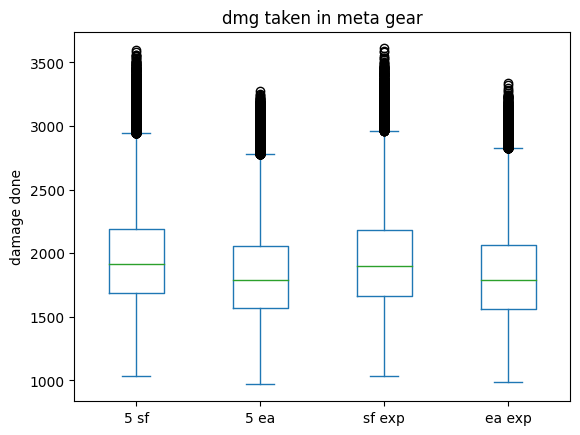

In [4]:
# List of the DataFrames
dataframes_list = [sf_df, ea_df, illegal_sf_df, illegal_ea_df]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
mean = [df['damage'].mean() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['5 sf','5 ea','sf exp','ea exp']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("dmg taken in meta gear")

base_resil_dmg = min(mean)
mean_dmg_percent = [round(x/base_resil_dmg,4) for x in mean]
mean_dmg_percent


### Resil Analysis

In [5]:
r0df = df[(df['amt resil']==0) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r1df = df[(df['amt resil']==1) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r2df = df[(df['amt resil']==2) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r3df = df[(df['amt resil']==3) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r4df = df[(df['amt resil']==4) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r5df = df[(df['amt resil']==5) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]

In [6]:
print(f"0 resil mean: {r0df['damage'].mean()} sf median: {r0df['damage'].median()} standard deviation: {round(r0df['damage'].std(),2)} max: {r0df['damage'].max()}")
print(f"1 resil mean: {r1df['damage'].mean()} sf median: {r1df['damage'].median()} standard deviation: {round(r1df['damage'].std(),2)} max: {r1df['damage'].max()}")
print(f"2 resil mean: {r2df['damage'].mean()} sf median: {r2df['damage'].median()} standard deviation: {round(r2df['damage'].std(),2)} max: {r2df['damage'].max()}")
print(f"3 resil mean: {r3df['damage'].mean()} sf median: {r3df['damage'].median()} standard deviation: {round(r3df['damage'].std(),2)} max: {r3df['damage'].max()}")
print(f"4 resil mean: {r4df['damage'].mean()} sf median: {r4df['damage'].median()} standard deviation: {round(r4df['damage'].std(),2)} max: {r4df['damage'].max()}")
print(f"5 resil mean: {r5df['damage'].mean()} sf median: {r5df['damage'].median()} standard deviation: {round(r5df['damage'].std(),2)} max: {r5df['damage'].max()}")


0 resil mean: 2166.67261 sf median: 2085.0 standard deviation: 482.27 max: 4057
1 resil mean: 2147.19674 sf median: 2077.0 standard deviation: 457.87 max: 3922
2 resil mean: 2127.38541 sf median: 2064.0 standard deviation: 439.25 max: 3854
3 resil mean: 2110.37153 sf median: 2056.0 standard deviation: 418.8 max: 3746
4 resil mean: 2090.97303 sf median: 2042.0 standard deviation: 399.33 max: 3652
5 resil mean: 2075.43302 sf median: 2033.0 standard deviation: 383.36 max: 3642


[1.0256, 1.0216, 1.0152, 1.0113, 1.0044, 1.0]

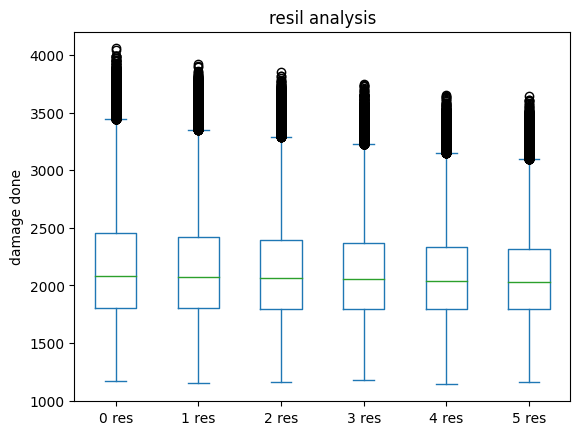

In [7]:
# List of the DataFrames
dataframes_list = [r0df,r1df,r2df,r3df,r4df,r5df]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
median = [df['damage'].median() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['0 res','1 res','2 res','3 res','4 res','5 res']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("resil analysis")

base_resil_dmg = min(median)
median_dmg_percent = [round(x/base_resil_dmg,4) for x in median]
median_dmg_percent

# r1df.sort_values(by='damage')

### attunement vs shirking analysis

In [8]:
def get_class_data(nw_class,data_points):
    df_input = [None]*data_points
    for i in range(data_points):
        temp_list = calc_rng_dmg.calc_dmg(nw_class,amt_resil_ui=5,amt_shirking_ui=0,amt_aversion_ui=0)
        df_input[i] = temp_list
    return df_input

shirk = get_class_data("med_bruiser_wh_shirk",100000)
attunement = get_class_data("med_bruiser_wh_attunement",100000)

df_shirk = pd.DataFrame(shirk,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])
df_attunement = pd.DataFrame(attunement,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])

In [9]:
print(f"shirking mean: {df_shirk['damage'].mean()} sf median: {df_shirk['damage'].median()} standard deviation: {round(df_shirk['damage'].std(),2)} max: {df_shirk['damage'].max()}")
print(f"attunement mean: {df_attunement['damage'].mean()} sf median: {df_attunement['damage'].median()} standard deviation: {round(df_attunement['damage'].std(),2)} max: {df_attunement['damage'].max()}")

shirking mean: 2330.98804 sf median: 2305.0 standard deviation: 525.05 max: 4348
attunement mean: 2387.64551 sf median: 2391.0 standard deviation: 488.29 max: 3787


[1.0, 1.0373]

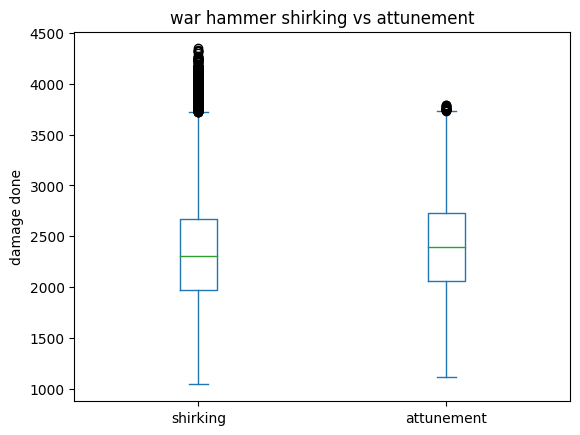

In [10]:
# List of the DataFrames
dataframes_list = [df_shirk,df_attunement]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
median = [df['damage'].median() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['shirking','attunement']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("war hammer shirking vs attunement")

base_resil_dmg = min(median)
median_dmg_percent = [round(x/base_resil_dmg,4) for x in median]
median_dmg_percent

In [14]:
fd = get_class_data("light_fs_vicious_fire_damage",100000)
ip = get_class_data("light_fs_vicious_invig_punishment",100000)

df_fd = pd.DataFrame(fd,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])
df_ip = pd.DataFrame(ip,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])

In [15]:
print(f"fire damage mean: {df_fd['damage'].mean()} sf median: {df_fd['damage'].median()} standard deviation: {round(df_fd['damage'].std(),2)} max: {df_fd['damage'].max()}")
print(f"invig punishment mean: {df_ip['damage'].mean()} sf median: {df_ip['damage'].median()} standard deviation: {round(df_ip['damage'].std(),2)} max: {df_ip['damage'].max()}")

shirking mean: 2075.95176 sf median: 2032.0 standard deviation: 386.73 max: 3642
attunement mean: 1984.90382 sf median: 1944.0 standard deviation: 372.35 max: 3469


[1.0453, 1.0]

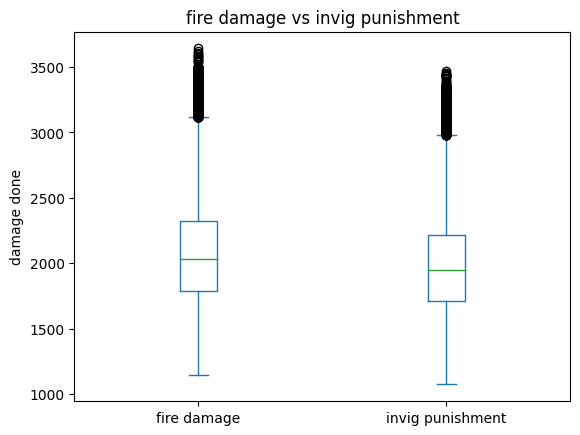

In [16]:
# List of the DataFrames
dataframes_list = [df_fd,df_ip]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
median = [df['damage'].median() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['fire damage','invig punishment']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("fire damage vs invig punishment")

base_resil_dmg = min(median)
median_dmg_percent = [round(x/base_resil_dmg,4) for x in median]
median_dmg_percent